#TRAIN


In [ ]:
a = []
while(1):
    a.append(‘1’)

SyntaxError: ignored

In [ ]:
import numpy as np
%tensorflow_version 2.x
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [ ]:
import os
import cv2

from google.colab import drive
drive.mount('/content/gdrive',  force_remount=True)

Mounted at /content/gdrive


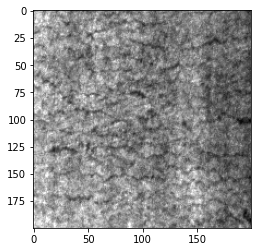

In [ ]:
DATADIR = r"/content/gdrive/My Drive/NEU-DET/IMAGES"
CATEGORIES = ["crazing","inclusion","patches","pitted_surface","rolled-in_scale","scratches"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap= "gray")
        plt.show()
        break
    break

In [ ]:
IMG_SIZE=200
training_data = []
def create_training_data():
    for category in CATEGORIES:
        print(category)
        path = os.path.join(DATADIR, category)
        class_num= CATEGORIES.index(category)
        print(len(os.listdir(path)))
        for img in os.listdir(path):
            print(img)
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

crazing
299
crazing_1.jpg
crazing_10.jpg
crazing_100.jpg
crazing_102.jpg
crazing_101.jpg
crazing_103.jpg
crazing_104.jpg
crazing_111.jpg
crazing_105.jpg
crazing_109.jpg
crazing_108.jpg
crazing_107.jpg
crazing_112.jpg
crazing_110.jpg
crazing_11.jpg
crazing_106.jpg
crazing_113.jpg
crazing_115.jpg
crazing_117.jpg
crazing_114.jpg
crazing_116.jpg
crazing_122.jpg
crazing_12.jpg
crazing_120.jpg
crazing_118.jpg
crazing_119.jpg
crazing_123.jpg
crazing_121.jpg
crazing_126.jpg
crazing_127.jpg
crazing_124.jpg
crazing_125.jpg
crazing_128.jpg
crazing_133.jpg
crazing_134.jpg
crazing_132.jpg
crazing_131.jpg
crazing_130.jpg
crazing_129.jpg
crazing_135.jpg
crazing_136.jpg
crazing_137.jpg
crazing_13.jpg
crazing_138.jpg
crazing_140.jpg
crazing_141.jpg
crazing_14.jpg
crazing_139.jpg
crazing_147.jpg
crazing_144.jpg
crazing_143.jpg
crazing_145.jpg
crazing_146.jpg
crazing_148.jpg
crazing_150.jpg
crazing_142.jpg
crazing_15.jpg
crazing_149.jpg
crazing_152.jpg
crazing_157.jpg
crazing_153.jpg
crazing_154.jpg
craz

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/your_project_folder/'

In [ ]:
import random

random.shuffle(training_data)

In [ ]:
x=[]
y=[]


In [ ]:
for features,label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE,IMG_SIZE,1)

In [ ]:
import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

X = pickle.load(open("x.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

datagen.fit(X_train)


train_generator = datagen.flow(np.array(X_train), np.array(y_train), batch_size=32,subset='training')
validation_generator = datagen.flow(np.array(X_train), np.array(y_train), batch_size=32,subset='validation')

test_generator = datagen.flow(np.array(X_test), np.array(y_test), batch_size=32)





model.add(Conv2D(4, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Flatten()) 
model.add(Dense(256))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
# model.fit(np.array(X), np.array(y), batch_size=32, epochs=3, validation_split=0.2)


# model.fit_generator(datagen.flow(np.array(X), np.array(y), batch_size=32),
#                     steps_per_epoch=200, epochs=50)

model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    validation_data = validation_generator, 
    validation_steps = 10,
    epochs = 20)


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 198, 198, 4)       40        
_________________________________________________________________
activation_97 (Activation)   (None, 198, 198, 4)       0         
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 99, 99, 4)         0         
_________________________________________________________________
batch_normalization_78 (Batc (None, 99, 99, 4)         16        
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 97, 97, 16)        592       
_________________________________________________________________
activation_98 (Activation)   (None, 97, 97, 16)        0         
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 48, 48, 16)      

In [ ]:
model.save("best_weights.hdf5")


In [ ]:
from google.colab import files
files.download('best_weights.hdf5')

In [ ]:
scores = model.evaluate_generator(test_generator,200)
print("Accuracy = ", scores[1])


NameError: ignored

In [ ]:
import gradio
import tensorflow as tf
image_mdl = tf.keras.applications.inception_v3.InceptionV3()

io = gradio.Interface(inputs="imageupload", outputs="label", model_type="keras", model=image_mdl)
io.launch()

ModuleNotFoundError: ignored

In [ ]:
pip install gradio

     |████████████████████████████████| 1.2MB 14.3MB/s 
     |████████████████████████████████| 215kB 53.0MB/s 
     |████████████████████████████████| 962kB 51.8MB/s 
     |████████████████████████████████| 2.7MB 50.2MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 


In [ ]:
import gradio
import tensorflow as tf
image_mdl = tf.keras.applications.inception_v3.InceptionV3()

io = gradio.Interface(inputs="imageupload", outputs="label", model_type="keras", model=image_mdl)
io.launch()

96116736/96112376 [==============================] - 1s 0us/step


AttributeError: ignored

In [ ]:
from tensorflow.keras import backend

In [ ]:
import gradio
import tensorflow as tf
image_mdl = tf.keras.applications.inception_v3.InceptionV3()

io = gradio.Interface(inputs="imageupload", outputs="label", model_type="keras", model=image_mdl)
io.launch()

AttributeError: ignored

#TESTING


In [ ]:
import os
import cv2
path='/content/gdrive/My Drive/testing image.jpg'
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split



model = Sequential()





model.add(Conv2D(4, (3, 3), input_shape=(200,200,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Flatten()) 
model.add(Dense(256))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
# model.fit(np.array(X), np.array(y), batch_size=32, epochs=3, validation_split=0.2)


# model.fit_generator(datagen.flow(np.array(X), np.array(y), batch_size=32),
#                     steps_per_epoch=200, epochs=50)




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 198, 4)       40        
_________________________________________________________________
activation_14 (Activation)   (None, 198, 198, 4)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 99, 99, 4)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 99, 99, 4)         16        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 97, 97, 16)        592       
_________________________________________________________________
activation_15 (Activation)   (None, 97, 97, 16)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 16)       

In [ ]:
model.load_weights('/content/gdrive/My Drive/best_weights.hdf5')

# New Section

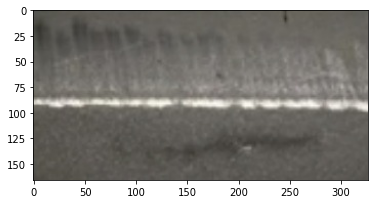

In [ ]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

# Read Images 
img = mpimg.imread(path) 
  
# Output Images 
plt.imshow(img) 

In [ ]:
import os
import cv2
IMG_SIZE=200
img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))


In [ ]:
print(new_array.shape)

(200, 200)


In [ ]:
test = np.array(new_array).reshape(-1,IMG_SIZE,IMG_SIZE,1)



In [ ]:
# model.predict

In [ ]:
# import pickle
# pickle_out = open("/content/gdrive/My Drive/x.pickle","wb")
# pickle.dump(x,pickle_out)
# pickle_out.close()

# pickle_out = open("/content/gdrive/My Drive/y.pickle","wb")
# pickle.dump(y,pickle_out)
# pickle_out.close()

In [ ]:
x = pickle.load(open("/content/gdrive/My Drive/x.pickle","rb"))
y = pickle.load(open("/content/gdrive/My Drive/y.pickle","rb"))

In [ ]:
print(x.shape)

(1793, 200, 200, 1)


In [ ]:
# x=[]
# y=[]

In [ ]:
# for features,label in training_data:
#     x.append(features)
#     y.append(label)

# x = np.array(x).reshape(-1, IMG_SIZE,IMG_SIZE,1)

In [ ]:
# print(y)

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

datagen.fit(x)


# train_generator = datagen.flow(np.array(x), np.array(y_train), batch_size=32,subset='training')
# validation_generator = datagen.flow(np.array(x), np.array(y_train), batch_size=32,subset='validation')

# test_generator = datagen.flow(np.array(x), np.array(y), batch_size=1)

In [ ]:
# test_generator2 = datagen.flow(np.array(x), batch_size=1)

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [ ]:
# pr=model.predict_generator(test_generator2,steps=637)
# print(pr.shape)

In [ ]:
test_generator3 = datagen.flow(np.array(test), batch_size=1)


In [ ]:
probabilities=model.predict_generator(test_generator3,steps=1)

In [ ]:
pred=np.argmax(probabilities[0])



In [ ]:
names=['crazing','inclusion','patches','pitted surface', 'rolled in scale', 'scratches']
print(names[pred])
plt.imshow(img) 

scratches
